Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5050 - loss: 0.7188 - val_accuracy: 0.5072 - val_loss: 0.6966
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5285 - loss: 0.6980 - val_accuracy: 0.6202 - val_loss: 0.6391
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.6798 - loss: 0.6049 - val_accuracy: 0.7226 - val_loss: 0.5609
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7449 - loss: 0.5225 - val_accuracy: 0.6918 - val_loss: 0.6006
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8100 - loss: 0.4468 - val_accuracy: 0.7348 - val_loss: 0.5803
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8558 - loss: 0.3723 - val_accuracy: 0.7396 - val_loss: 0.5739
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8802 - loss: 0.3190 - val_accuracy: 0.7412 - val_loss: 0.5741
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9072 - loss: 0.2679 - 

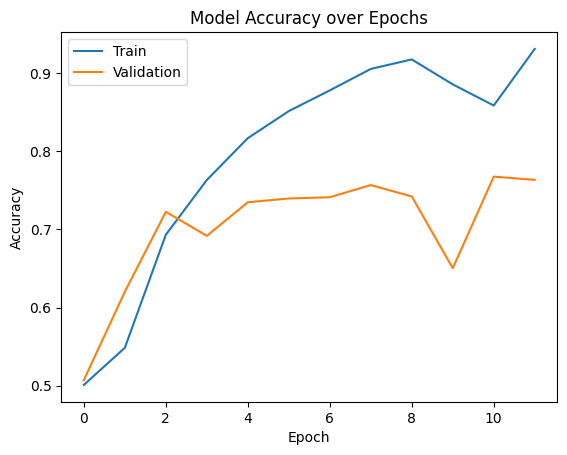

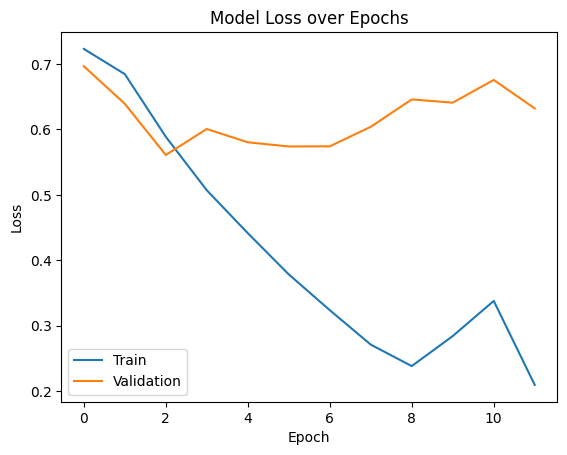

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
Predicted Sentiment: Negative


In [8]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Set parameters for the dataset (IMPROVED)
max_features = 20000      # Vocabulary size
maxlen = 600              # Allow longer reviews → better context

# 3. Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build the RNN model
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, 128))  # Increased embedding size 64 → 128

# RNN Layer
model.add(SimpleRNN(128, return_sequences=False))  # Increased units 64 → 128

# Dropout Layer to reduce overfitting
model.add(Dropout(0.4))  # Slightly reduced from 0.5 → 0.4

# Extra Dense Layer
model.add(Dense(32, activation='relu'))

# Dropout again
model.add(Dropout(0.2))  # Slightly reduced from 0.3 → 0.2

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(
    x_train, y_train,
    epochs=12,           # Increased epochs from 5 → 12
    batch_size=64,
    validation_split=0.2
)

# 8. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot Accuracy and Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Predict on a sample
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")
